# Przekształcanie układów wspoółrzędnych

Data i grupa:

Uczestnicy:

In [1]:
#All imports go here
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pickle
from typing import Optional, Tuple, Dict

## Zadanie 1.

Z wykorzystaniem biblioteki SymPy (https://docs.sympy.org/latest/index.html) wyprowadzić macierz rotacji na podstawie kątów Eulera dla prawoskrętnego układu współrzędnych przyjmując kolejność obrotów roll-pitch-yaw ($\alpha,\;\beta,\;\gamma$) oraz wyliczyć wartości liczbowe dla kątów $\alpha=95^o,\;\beta=88^o,\;\gamma=48^o$.
Następnie zaproponować metodę odwrotną tj. wyznaczyć kąty roll, pitch i yaw z  macierzy obrotu oraz sprawdzić jaki błąd powstał po wykonaniu przekształcenia w obu kierunkach. Skomentować uzyskane wyniki.
Macierze obrotu względem osi $x,y,z$:

\begin{equation*}
R_x =\begin{bmatrix} 
      1 && 0 && 0  \\ 
      0 && \cos \: \alpha && -\sin \: \alpha  \\
      0 && \sin \: \alpha && \cos \: \alpha  \\
   \end{bmatrix}
\end{equation*}

\begin{equation*}
R_y =\begin{bmatrix} 
      \cos \: \beta && 0 && \sin \: \beta  \\ 
      0 && 1 && 0  \\
      -\sin \: \beta && 0 && \cos \: \beta  \\
   \end{bmatrix}
\end{equation*}

\begin{equation*}
R_z =\begin{bmatrix}
      \cos \: \gamma && -\sin \: \gamma && 0\\
      \sin \: \gamma && \cos \: \gamma  && 0\\
      0 && 0 && 1  \\ 
   \end{bmatrix}
\end{equation*}

Przykład wykorzystania biblioteki SymPy:
```python
import sympy as sym
x, y, z, t = sym.symbols('x y z t')
K = sym.Matrix([[x*t,y/t],[z, 0]])
```


### Rozwiązanie

In [153]:
# Your solution goes here
alpha,beta,gamma= sym.symbols('alpha beta gamma')    
alpha=85
beta=88
gamma=48
Rx=sym.Matrix([[1,0,0],[0,sym.cos(alpha),-sym.sin(alpha)],[0,sym.sin(alpha),sym.cos(alpha)]])
Ry=sym.Matrix([[sym.cos(beta),0,sym.sin(beta)],[0,1,0],[-sym.sin(beta),0,sym.cos(beta)]])
Rz=sym.Matrix([[sym.sin(gamma),-sym.sin(gamma),0],[sym.sin(gamma),sym.cos(gamma),0],[0,0,1]])


                                                     

In [154]:
display(Rx)
display(Ry)
display(Rz)

Matrix([
[1,       0,        0],
[0, cos(85), -sin(85)],
[0, sin(85),  cos(85)]])

Matrix([
[ cos(88), 0, sin(88)],
[       0, 1,       0],
[-sin(88), 0, cos(88)]])

Matrix([
[sin(48), -sin(48), 0],
[sin(48),  cos(48), 0],
[      0,        0, 1]])

In [201]:
R=Rz.T@Ry.T@Rx.T
display(R)

Matrix([
[ sin(48)*cos(88),  sin(48)*sin(85)*sin(88) + sin(48)*cos(85), -sin(48)*sin(88)*cos(85) + sin(48)*sin(85)],
[-sin(48)*cos(88), -sin(48)*sin(85)*sin(88) + cos(48)*cos(85),  sin(48)*sin(88)*cos(85) + sin(85)*cos(48)],
[         sin(88),                           -sin(85)*cos(88),                            cos(85)*cos(88)]])

In [421]:
vect=sym.Matrix([1,0,0])
out=R@vect
display(out)
inv_out=sym.Inverse(R)*out
print('Macierz odwrócona:')
display(inv_out.evalf())
print('Błąd przy odwracaniu:')
print(np.mean(vect-inv_out).evalf())

Matrix([
[ sin(48)*cos(88)],
[-sin(48)*cos(88)],
[         sin(88)]])

Macierz odwrócona:


Matrix([
[     1.0],
[-0.e-127],
[ 0.e-124]])

Błąd przy odwracaniu:
-0.e-124


## Zadanie 2.

Wykorzystując dane z popularnego symulatora CARLA (http://carla.org/) wyrysować 3D Bounding Box na obrazie z kamery.
3D Bounding Box są zapisane w formacie:
* położenie obiektu (x,y,z) w układzie współrzędnych samochodu
* połowa wysokości
* połowa szerokość
* połowa długości

Dodatkowo posiadamy informację o pozycji i orientacji samochodu względem układu współrzędnych świata oraz 
pozycji i orientacji kamery względem układu współrzędnych samochodu.
Szczegółowe informacje znajdują się na stronie (https://carla.readthedocs.io/en/latest/)

Należy przekształcić punkty do układu współrzędnych świata, potem do układu współrzędnych kamery, następnie zrzutować je na płaszczyznę obrazu według następującego wzoru:
\begin{equation}
\begin{bmatrix}
u\\
v\\
1
\end{bmatrix}
= \frac{1}{z}
\begin{bmatrix} 
      f && 0 && u_0  \\ 
      0 && f && v_0  \\
      0 && 0 && 1  \\
\end{bmatrix}
\begin{bmatrix} 
      x\\
      y\\
      z
\end{bmatrix}
\quad z>0
\end{equation}
Gdzie:
* $u,v$ współrzedne obrazu
* $f$ ogniskowa kamery
* $u_0, v_0$ współrzedne środka obrazu.
* $x,y,z$ punkty w układzie współrzędnym kamery

Ostatecznie należy wyświetlić zdjęcie z wyrysowanymi liniami.
Wszystkie potrzebne dane wraz z obrazem znajdują się w słowniku w plikach "frame*.dat".

Opis danych:
* Zdjęcie: 
         data['sensors']['FrontCamera']
* Lista samochodów: 
         data['actors']
* Zarówno kamera oraz samochody mają następuące pola:
         ['transform']['location']['x']
         ['transform']['location']['y']
         ['transform']['location']['z']
         ['transform']['rotation']['roll']
         ['transform']['rotation']['pitch']
         ['transform']['rotation']['yaw']
* Samochód ma dodatkowo pola:
         ['bounding_box']['location']['x']
         ['bounding_box']['location']['y']
         ['bounding_box']['location']['z']
         ['bounding_box']['extent']['x']
         ['bounding_box']['extent']['y']
         ['bounding_box']['extent']['z']
* Kamera ma dodatkowo pola:
         ['raw_data'] zdjęcie w formacie BGR 0-255
         ['calibration']['intrinsic'] macierz 3x3 z prametrami inrinsic

         
<img src="drawing_transformations.png" width="600" />

<img src="lines.png" />

### Podpowiedzi:
* W przypadku CARLI macierz rotacji ma nastepującą formę:

\begin{equation}
\begin{bmatrix} 
      cos\beta cos\gamma  && sin\alpha sin\beta cos\gamma - sin\gamma cos\alpha && - sin\alpha sin\beta cos\gamma - sin\alpha sin\gamma     \\ 
      cos\beta sin\gamma && sin\alpha sin\beta sin\gamma + cos\alpha cos\gamma  && -cos\alpha sin\beta sin\gamma + sin\alpha cos\gamma \\
      sin\beta && - sin\alpha cos\beta && cos\alpha cos\beta  
\end{bmatrix}
\end{equation}
Czy jest to macierz dla układu lewoskrętnego czy dla układu prawoskrętnego?


* Przed rzutowaniem na kamerę  trzeba zamienić współrzędne w następujący sposób: $x=y, y=-z, z=x$. Dlaczego? 
* Dodatkowo predefiniowane funkcje

In [513]:
# Przykład wczytania danych
with open("frame1.dat", 'rb') as f:
    data = pickle.load(f)
    actors_data=[i for i in data["actors"]]

In [514]:
# Przykład stworzenia 8 wierzchołków prostopadłościanu
def create_bb_points(actor: dict, scale: Optional[float] = 1) -> np.ndarray:
    cords = np.zeros((8, 4))
    bb = actor["bounding_box"]
    extent_x = bb["extent"]["x"]
    extent_y = bb["extent"]["y"]
    extent_z = bb["extent"]["z"]
    center = np.array([bb["location"]["x"], bb["location"]["y"], bb["location"]["z"], 0])
    # base
    cords[0, :] = np.array([scale * extent_x, scale * extent_y, -scale * extent_z, 1])
    cords[1, :] = np.array([-scale * extent_x, scale * extent_y, -scale * extent_z, 1])
    cords[2, :] = np.array([-scale * extent_x, -scale * extent_y, -scale * extent_z, 1])
    cords[3, :] = np.array([scale * extent_x, -scale * extent_y, -scale * extent_z, 1])
    # top
    cords[4, :] = np.array([scale * extent_x, scale * extent_y, scale * extent_z, 1])
    cords[5, :] = np.array([-scale * extent_x, scale * extent_y, scale * extent_z, 1])
    cords[6, :] = np.array([-scale * extent_x, -scale * extent_y, scale * extent_z, 1])
    cords[7, :] = np.array([scale * extent_x, -scale * extent_y, scale * extent_z, 1])
    return (cords+center).T

In [519]:
def camera_transformation(camera,actor):
    #macierz przekształceń w oparciu o intrinsic
  
    
    
    calibration_Matrix=camera['calibration']['intrinsic']
    #display(calibration_Matrix)
    alpha,beta,gamma=sym.symbols('alpha beta gamma')
    x,y,z=sym.symbols('x,y,z')
    #a,b,g wprowadzenie danych
    alpha=camera['transform']['rotation']['roll']
    beta=camera['transform']['rotation']['pitch']
    gamma=camera['transform']['rotation']['yaw']
    sin_a=sym.sin(alpha)
    sin_b=sym.sin(beta)
    sin_g=sym.sin(gamma)
    cos_a=sym.cos(alpha)
    cos_b=sym.cos(beta)
    cos_g=sym.cos(gamma)
    # wspolrzedne kamery
    x=camera['transform']['location']['x']
    y=camera['transform']['location']['y']
    z=camera['transform']['location']['z']
    
    x,y,z=y,-z, x
    
    trans=sym.Matrix(
        [[cos_b*cos_g,sin_a*sin_b*cos_g-sin_g*cos_a,-sin_a*sin_b*cos_g-sin_a*sin_g,x],
         [cos_b*sin_g,sin_a*sin_b*sin_g+cos_a*cos_g,-cos_a*sin_b*sin_g+sin_a*cos_g,y],
         [sin_b,-sin_a*cos_b,cos_a*cos_b,z]]
    )
# analogicznie ręcznie
#     Rx=sym.Matrix([[1,0,0],[0,sym.cos(alpha),-sym.sin(alpha)],[0,sym.sin(alpha),sym.cos(alpha)]])
#     Ry=sym.Matrix([[sym.cos(beta),0,sym.sin(beta)],[0,1,0],[-sym.sin(beta),0,sym.cos(beta)]])
#     Rz=sym.Matrix([[sym.sin(gamma),-sym.sin(gamma),0],[sym.sin(gamma),sym.cos(gamma),0],[0,0,1]])  
#     R=R=Rz.T@Ry.T@Rx.T
#     display(R)
#     trans=sym.Matrix([R[:,0].T,R[:,1].T,R[:,2].T,[x,y,z]]).T
    _image=trans@actor
    
    return _image
    
    
    
    
    

#camera_transformation(data['sensors']['FrontCamera'])  

In [520]:
def create_actor_transformation(position,actor):
    #macierz przekształceń w oparciu o intrinsic
  
    
    
    calibration_Matrix=data['sensors']['FrontCamera']['calibration']['intrinsic']
    #display(calibration_Matrix)
    alpha,beta,gamma=sym.symbols('alpha beta gamma')
    x,y,z=sym.symbols('x,y,z')
    #a,b,g wprowadzenie danych
    alpha=position['transform']['rotation']['roll']
    beta=position['transform']['rotation']['pitch']
    gamma=position['transform']['rotation']['yaw']
    sin_a=sym.sin(alpha)
    sin_b=sym.sin(beta)
    sin_g=sym.sin(gamma)
    cos_a=sym.cos(alpha)
    cos_b=sym.cos(beta)
    cos_g=sym.cos(gamma)
    # wspolrzedne kamery
    x=position['transform']['location']['x']
    y=position['transform']['location']['y']
    z=position['transform']['location']['z']
    
    x,y,z=y,-z, x
    
    trans=sym.Matrix(
        [[cos_b*cos_g,sin_a*sin_b*cos_g-sin_g*cos_a,-sin_a*sin_b*cos_g-sin_a*sin_g,x],
         [cos_b*sin_g,sin_a*sin_b*sin_g+cos_a*cos_g,-cos_a*sin_b*sin_g+sin_a*cos_g,y],
         [sin_b,-sin_a*cos_b,cos_a*cos_b,z]]
    )
# analogicznie ręcznie
#     Rx=sym.Matrix([[1,0,0],[0,sym.cos(alpha),-sym.sin(alpha)],[0,sym.sin(alpha),sym.cos(alpha)]])
#     Ry=sym.Matrix([[sym.cos(beta),0,sym.sin(beta)],[0,1,0],[-sym.sin(beta),0,sym.cos(beta)]])
#     Rz=sym.Matrix([[sym.sin(gamma),-sym.sin(gamma),0],[sym.sin(gamma),sym.cos(gamma),0],[0,0,1]])  
#     R=R=Rz.T@Ry.T@Rx.T
#     display(R)
#     trans=sym.Matrix([R[:,0].T,R[:,1].T,R[:,2].T,[x,y,z]]).T
    _image=trans@actor
    
    return _image
    

In [521]:
def display_in_2d(actor):
    calibration_Matrix=data['sensors']['FrontCamera']['calibration']['intrinsic']
    actor[0,:],actor[1,:],actor[2,:]=actor[1,:],-actor[2,:],actor[0,:]
    new_BB=[]
    for i in range(0,8):
        z=actor[2,i]
        new_BB.append((1/z)*calibration_Matrix@actor[:,i])
    boundingbox=np.array(new_BB)
    #display(boundingbox.T)
    return boundingbox.T
        
        
        

        
        

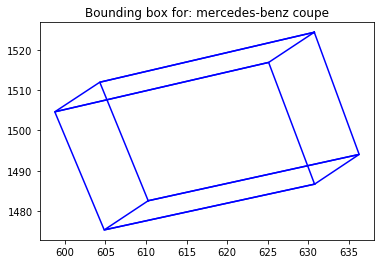

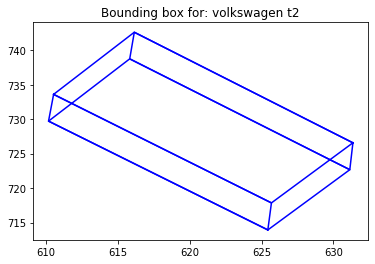

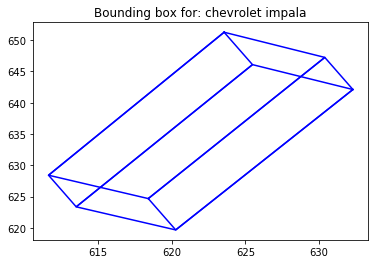

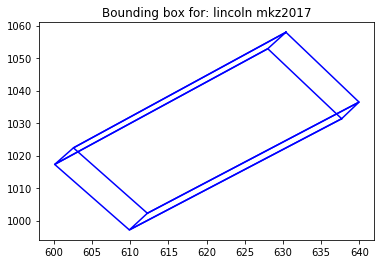

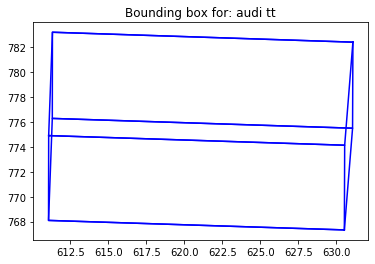

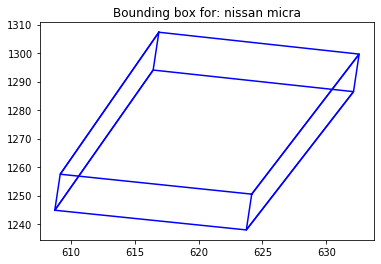

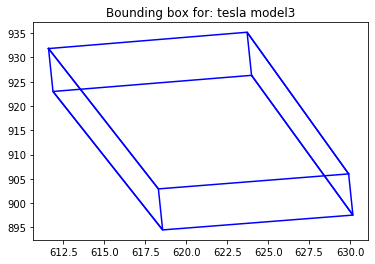

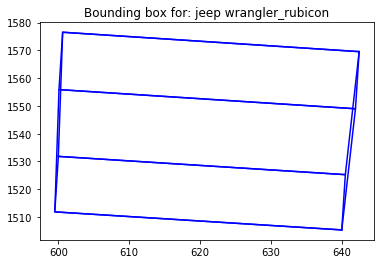

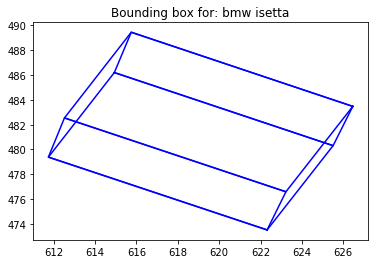

In [525]:
actors_cordinates=[]
for actor in actors_data:
    #actors_cordinates.append(create_bb_points(actor)[:,0])
    actors_cordinates.append(display_in_2d(create_actor_transformation(actor,create_bb_points(actor))))
    
    
#display(actors_cordinates)
i=0

for actor in actors_cordinates:
   
    point=actor[0:2,:]
    #display(point)
    ax=plt.figure()
    #plt.scatter(point[0,:],point[1,:])
    rect1=[(actor[0,0],actor[1,0]),(actor[0,1],actor[1,1]),(actor[0,2],actor[1,2]),(actor[0,3],actor[1,3])]
    rect2=[(actor[0,0],actor[1,0]),(actor[0,1],actor[1,1]),(actor[0,5],actor[1,5]),(actor[0,4],actor[1,4])]
    rect3=[(actor[0,2],actor[1,2]),(actor[0,3],actor[1,3]),(actor[0,7],actor[1,7]),(actor[0,6],actor[1,6])]
    rect4=[(actor[0,7],actor[1,7]),(actor[0,6],actor[1,6]),(actor[0,5],actor[1,5]),(actor[0,4],actor[1,4])]
    id=data["actors"][i]["type_id"]
   
    raw_name=id.split('.')
    name=raw_name[1]+' '+raw_name[2]
    plt.plot(*zip(*(rect1+rect1[:1])),color='b')
    plt.plot(*zip(*(rect2+rect2[:1])),color='b')
    plt.plot(*zip(*(rect3+rect3[:1])),color='b')
    plt.plot(*zip(*(rect4+rect4[:1])),color='b') 
    plt.title(f"Bounding box for: {name}")
    i+=1


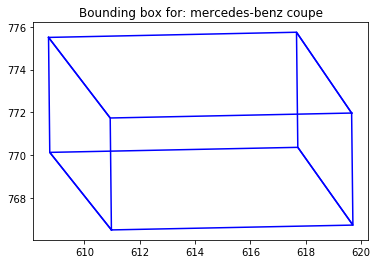

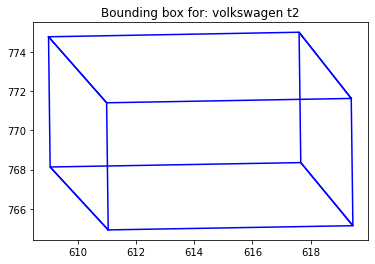

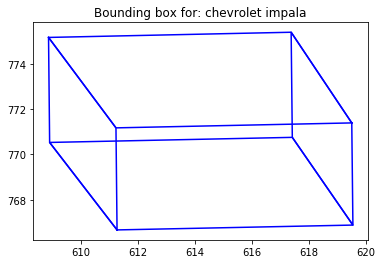

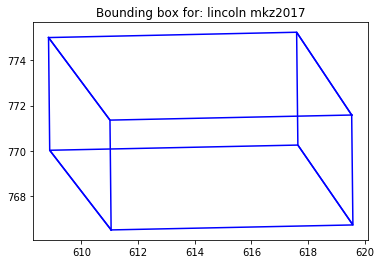

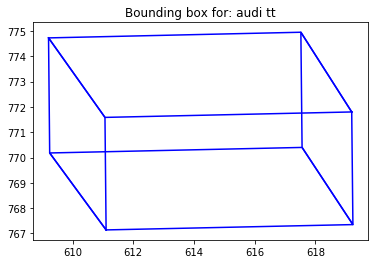

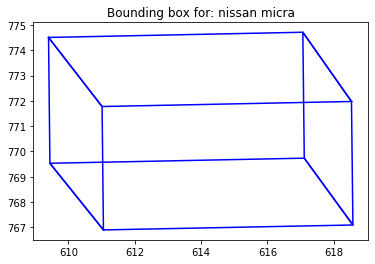

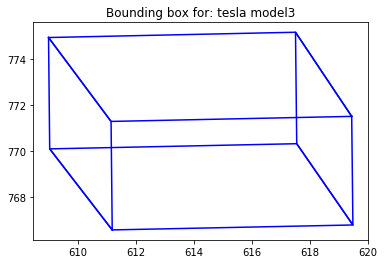

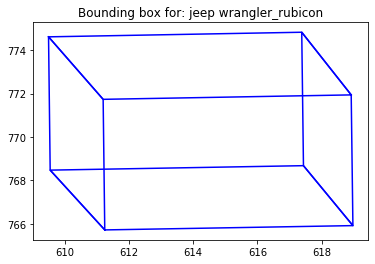

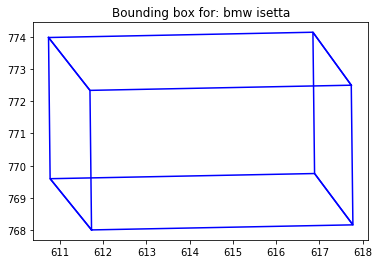

In [527]:
actors_cordinates=[]
for actor in actors_data:
    #actors_cordinates.append(create_bb_points(actor)[:,0])
    actors_cordinates.append(display_in_2d(camera_transformation(data['sensors']['FrontCamera'],create_bb_points(actor))))
    
    
#display(actors_cordinates)
i=0

for actor in actors_cordinates:
   
    point=actor[0:2,:]
    #display(point)
    ax=plt.figure()
    #plt.scatter(point[0,:],point[1,:])
    rect1=[(actor[0,0],actor[1,0]),(actor[0,1],actor[1,1]),(actor[0,2],actor[1,2]),(actor[0,3],actor[1,3])]
    rect2=[(actor[0,0],actor[1,0]),(actor[0,1],actor[1,1]),(actor[0,5],actor[1,5]),(actor[0,4],actor[1,4])]
    rect3=[(actor[0,2],actor[1,2]),(actor[0,3],actor[1,3]),(actor[0,7],actor[1,7]),(actor[0,6],actor[1,6])]
    rect4=[(actor[0,7],actor[1,7]),(actor[0,6],actor[1,6]),(actor[0,5],actor[1,5]),(actor[0,4],actor[1,4])]
    id=data["actors"][i]["type_id"]
   
    raw_name=id.split('.')
    name=raw_name[1]+' '+raw_name[2]
    plt.plot(*zip(*(rect1+rect1[:1])),color='b')
    plt.plot(*zip(*(rect2+rect2[:1])),color='b')
    plt.plot(*zip(*(rect3+rect3[:1])),color='b')
    plt.plot(*zip(*(rect4+rect4[:1])),color='b') 
    plt.title(f"Bounding box for: {name}")
    i+=1
